Plotting the viewership of Anerican Ninja Warrior 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

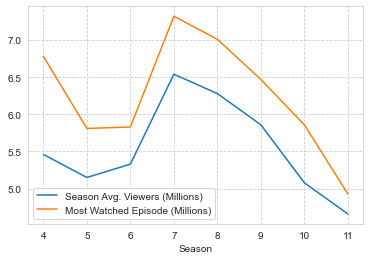

In [20]:
ANWrating_df = pd.read_csv('C:\\Users\\Reape\\OneDrive\\Desktop\\ANWratings.csv')

sns.set_style("whitegrid", {
    "ytick.major.size": 0.1,
    "ytick.minor.size": 0.05,
    'grid.linestyle': '--'
 })

ax=plt.gca()
ANWrating_df.plot(kind='line', x='Season', y='Season Avg. Viewers (Millions)', ax=ax)
ANWrating_df.plot(kind='line', x='Season', y='Most Watched Episode (Millions)', ax=ax )
plt.show()   

Plotting the "Popular" Ninjas in the Chicoland Area

In [2]:
import folium

In [19]:
IL_ninja_df = pd.read_excel('C:\\Users\\Reape\\Downloads\\ninjasfromIL.xlsx')
print(IL_ninja_df.head)

il_ninjamap = folium.Map(location=[42.0000, -87.9985],
                         zoom_start=8.5)

folium.Marker(location=[41.7508, -88.1535],
              popup='Jesse Labreck',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

folium.Marker(location=[41.7608, -88.1600],
              popup='Chris DiGangi',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

folium.Marker(location=[41.7408, -88.1400],
              popup='Michael Torres',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

folium.Marker(location=[41.8781, -87.6298],
              popup='Ethan Swanson',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

folium.Marker(location=[41.8781, -87.7298],
              popup='Dan Polizzi',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

folium.Marker(location=[41.8781, -87.7798],
              popup='Brandon Mears',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

folium.Marker(location=[41.6986, -88.0684],
              popup='Jimmy Choi',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

folium.Marker(location=[42.0630, -88.1227],
              popup='Tyler Yamauchi',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

folium.Marker(location=[42.4106, -88.0262],
              popup='Michael Silenzi',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

folium.Marker(location=[41.5425, -87.6023],
              popup='Kyle Schulze',
              icon=folium.Icon(color='red')).add_to(il_ninjamap)

il_ninjamap

<bound method NDFrame.head of      Ninjas from Illinois             Location    Latitude   Longitude
0    Jesse "Flex" Labreck       Naperville, IL  41.7508° N  88.1535° W
1           Chris Digangi       Naperville, IL  41.7508° N  88.1535° W
2          Michael Torres       Naperville, IL  41.7508° N  88.1535° W
3           Ethan Swanson          Chicago, IL  41.8781° N  87.6298° W
4             Dan Polizzi          Chicago, IL  41.8781° N  87.6298° W
5           Brandon Mears          Chicago, IL  41.8781° N  87.6298° W
6  Jimmy "Fox Ninja" Choi      Bolingbrook, IL  41.6986° N  88.0684° W
7          Tyler Yamauchi  Hoffman Estates, IL  42.0630° N  88.1227° W
8         Michael Silenzi      Lindenhurst, IL  42.4106° N  88.0262° W
9            Kyle Schulze         Glenwood, IL  41.5425° N  87.6023° W>


Marking the traditional gyms in the Chicagoland Area

In [1]:
from pandas.io.json import json_normalize
import json, requests
import folium
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np

In [11]:
CLIENT_ID = 'DMT1ZSCN0SBX05TSBCUAZUT2QH3K3215JXKBY11DKOW10K1F' 
CLIENT_SECRET = 'X1GPLTRBWXHUMSA2MCFKCSIDPWXZUMJXUT2BHHPRTP1BEE3X' 
VERSION = '20201111' 
LIMIT = 10000 

address = 'Chicago'

geolocator = Nominatim(user_agent='foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print(latitude, longitude)

search_query = 'gym'
radius = 100000

gym_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

results = requests.get(gym_url).json()
gyms_result = results['response']['venues']
gym_df = json_normalize(gyms_result)

filtered_columns = ['name', 'categories'] + [col for col in gym_df.columns if col.startswith('location')]+['id']
gym_df_filtered = gym_df.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

gym_df_filtered['categories'] = gym_df_filtered.apply(get_category_type, axis=1)

gym_df_filtered.columns = [column.split('.')[-1] for column in gym_df_filtered.columns]

gym_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(gym_df_filtered.lat, gym_df_filtered.lng, gym_df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
    ).add_to(gym_map)
    
gym_map

<ipython-input-11-61109b737119>:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  gym_df = json_normalize(gyms_result)


In [16]:
il_ninjgymmap = folium.Map(location=[42.0000, -87.9985],
                         zoom_start=9.5)

folium.Marker(location=[41.976490, -87.669640],
              popup='Parkour Ways & Art du De`placement',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmap)

folium.Marker(location=[41.961151, -87.701622],
              popup='Ultimate Ninjas',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmap)

folium.Marker(location=[41.950500, -87.692500],
              popup='Windy City Ninjas',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmap)

folium.Marker(location=[41.921900, -87.962960],
              popup='Windy City Ninjas Elmhurst',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmap)

folium.Marker(location=[41.842990, -87.8213790],
              popup='Flipside Academy of Movement',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmap)

il_ninjgymmap

Placing Ninja Gyms Projection

In [43]:
il_ninjgymmapproj = folium.Map(location=[42.0000, -87.9985],
                         zoom_start=9.5)

folium.Marker(location=[41.976490, -87.669640],
              popup='Parkour Ways & Art du De`placement',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmapproj)

folium.Marker(location=[41.961151, -87.701622],
              popup='Ultimate Ninjas',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmapproj)

folium.Marker(location=[41.950500, -87.692500],
              popup='Windy City Ninjas',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmapproj)

folium.Marker(location=[41.921900, -87.962960],
              popup='Windy City Ninjas Elmhurst',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmapproj)

folium.Marker(location=[41.842990, -87.8213790],
              popup='Flipside Academy of Movement',
              icon=folium.Icon(color='green')).add_to(il_ninjgymmapproj)

folium.Marker(location=[42.1663, -87.9631],
              popup='Buffalo Grove, IL',
              icon=folium.Icon(color='blue')).add_to(il_ninjgymmapproj)

folium.Marker(location=[42.0354, -88.2826],
              popup='Elgin, IL',
              icon=folium.Icon(color='blue')).add_to(il_ninjgymmapproj)

folium.Marker(location=[41.8661, -88.1070],
              popup='Wheaton, IL',
              icon=folium.Icon(color='blue')).add_to(il_ninjgymmapproj)

folium.Marker(location=[42.0778, -87.8223],
              popup='Glenview, IL',
              icon=folium.Icon(color='blue')).add_to(il_ninjgymmapproj)


il_ninjgymmapproj

Plotting Childhood Obesity with Kmeans

In [39]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

    Time  Age  PercentObese
0   1971    2           5.0
1   1976    2           5.0
2   1988    2           7.2
3   2000    2          10.3
4   2001    2          10.6
..   ...  ...           ...
94  2006   19          17.3
95  2008   19          16.8
96  2010   19          17.1
97  2011   19          20.7
98  2014   19          21.4

[99 rows x 3 columns]


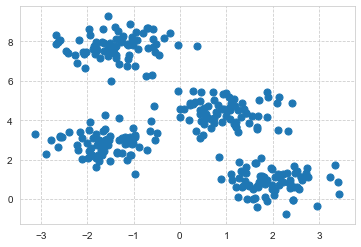

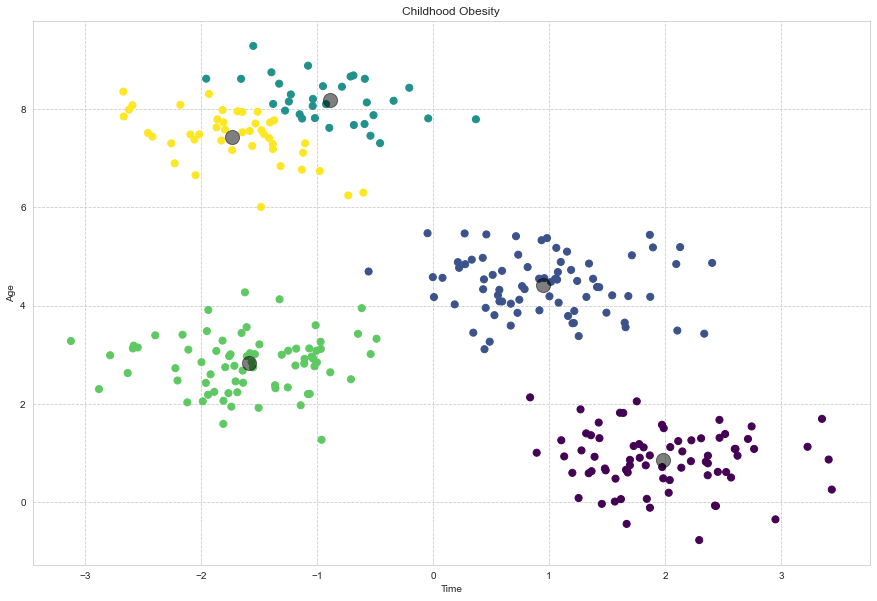

In [41]:
child_ob_df = pd.read_csv('C:\\Users\\Reape\\Downloads\\obesity_child_age.csv')

child_ob_df.drop(['SE'], axis='columns', inplace=True)

child_ob_df.drop(['Gender'], axis='columns', inplace=True)

print(child_ob_df)
X = child_ob_df.values
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)

km = KMeans(n_clusters=5)
km.fit(X)
y_kmeans = km.predict(X)
labels = km.labels_
results = pd.DataFrame([child_ob_df.index, labels])
ax.set_title('Childhood Obesity')
ax.set_xlabel('Time')
ax.set_ylabel('Age')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()    